<a href="https://colab.research.google.com/github/yeahginny/Machine_learning/blob/main/0825_DeepLearning(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

4422102/4422102 [==============================] - 1s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


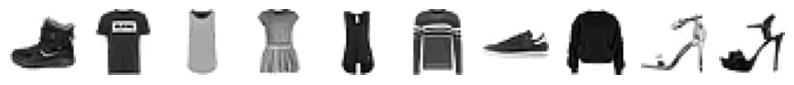

In [2]:
# 1. 데이터 로딩 및 탐색

# 데이터 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 데이터 형태 출력
print("Training data shape:", train_input.shape, train_target.shape)
print("Test data shape:", test_input.shape, test_target.shape)

# 처음 10개의 이미지를 시각화
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [3]:
# 처음 10개의 타겟 레이블 출력
print("First 10 training labels:", [train_target[i] for i in range(10)])

First 10 training labels: [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


labels_and_names = [(label, class_names[label]) for label in train_target[:10]]
labels_and_names

[(9, 'Ankle boot'),
 (0, 'T-shirt/top'),
 (0, 'T-shirt/top'),
 (3, 'Dress'),
 (0, 'T-shirt/top'),
 (2, 'Pullover'),
 (7, 'Sneaker'),
 (2, 'Pullover'),
 (5, 'Sandal'),
 (5, 'Sandal')]

In [5]:
# 타겟 레이블의 고유한 값 및 각 레이블의 개수 출력
unique_targets, counts = np.unique(train_target, return_counts=True)
print("Unique target labels:", unique_targets)
print("Counts of each label:", counts)

Unique target labels: [0 1 2 3 4 5 6 7 8 9]
Counts of each label: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [6]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28,28)

In [7]:
train_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
# 3. 모델 생성 및 컴파일

# 단순한 완전 연결 계층을 사용한 모델 생성
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 입력 데이터를 1D로 변환
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [10]:
# 4. 모델 학습
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5851 - accuracy: 0.8005
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4658 - accuracy: 0.8423
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4450 - accuracy: 0.8501
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4345 - accuracy: 0.8533
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4263 - accuracy: 0.8547


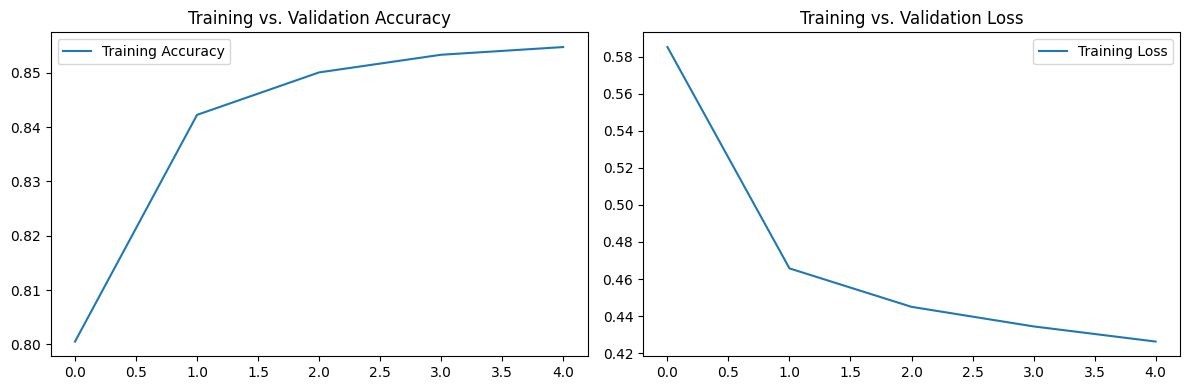

In [11]:
# 6. 결과 시각화

# 훈련 및 검증 정확도 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.tight_layout()
plt.show()